In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [10]:
df = sns.load_dataset('flights')
print(df.head())
# we get only year nd month for the date, we need day also

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121


In [11]:
# convert the date to a YYYY-MM-DD format in a new column named yearMonth
df['yearMonth'] = "01-" +df['month'].astype(str)+"-"+df['year'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB
None


In [12]:
# yearMonth is of type object - we may have problems later , o convert it into datetime
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB
None
   year month  passengers  yearMonth
0  1949   Jan         112 1949-01-01
1  1949   Feb         118 1949-02-01
2  1949   Mar         132 1949-03-01
3  1949   Apr         129 1949-04-01
4  1949   May         121 1949-05-01


In [13]:
# Make yearMonth column as the dataframe index
df.set_index('yearMonth',inplace=True) # inplac will make permanent changes to the DF
print(df.head())

            year month  passengers
yearMonth                         
1949-01-01  1949   Jan         112
1949-02-01  1949   Feb         118
1949-03-01  1949   Mar         132
1949-04-01  1949   Apr         129
1949-05-01  1949   May         121


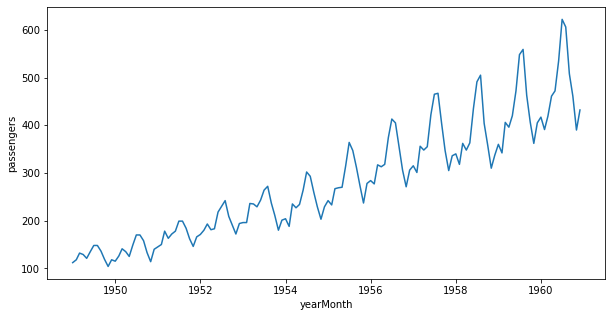

In [14]:
# Visualize the time series
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x = df.index, y=df.passengers)
plt.show()

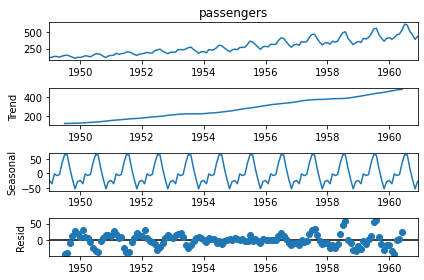

In [17]:
# Check further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers, period = 12)
fig = decomposition.plot()
plt.show()
# Upward trend and clear seasonality